In [1]:
# importing all the necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Company Stock and Investment.csv')

In [3]:
df.head(5)

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df.drop(['Gold Investments','Oil Investments','Other sharesInvestments'],axis=1,inplace=True)

In [5]:
df.head(2)

,Date,Comp Stock
0,31-12-2009,0.017354
1,04-01-2010,0.015565


In [6]:
# Checking any null value
df.isnull().sum()

Date          0
Comp Stock    0
dtype: int64

In [7]:
# Convert Date into Datetime
df['Date']=pd.to_datetime(df['Date'])

In [8]:
# Setting Date as index
df1=df.set_index('Date')

In [9]:
df1.head(2)

,Comp Stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565


In [10]:
df1.describe()

,Comp Stock
count,1984.000000
mean,0.001007
std,0.016017
min,-0.123558
25%,-0.006926
50%,0.000876
75%,0.009708
max,0.088741


# Visualizing data

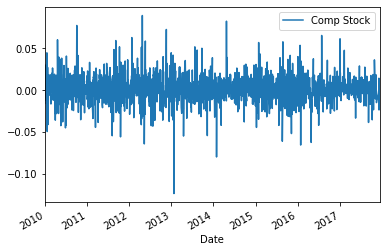

In [11]:
df1.plot()

C:\Users\RIA MAITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


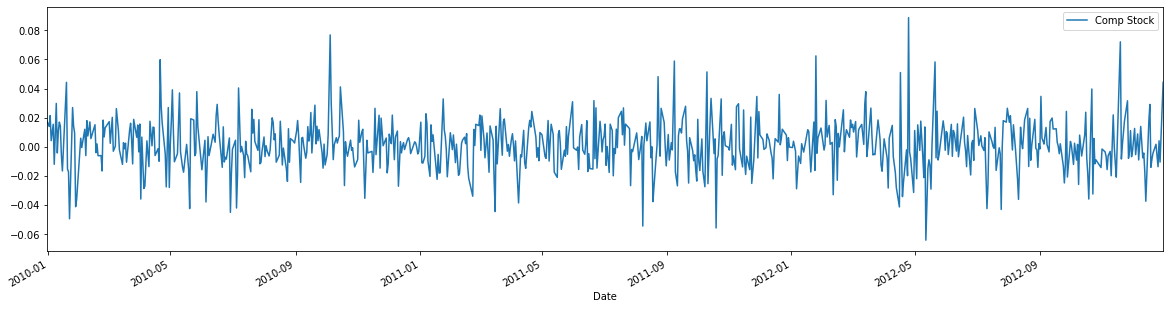

In [13]:
till_date='2012-12-31'
df_seg_1=df.loc[df['Date']<=(till_date)]
df_seg_1['Date']=pd.to_datetime(df_seg_1['Date'])
df_seg_1.set_index('Date',inplace=True)
df_seg_1.plot(figsize=(20,5))

C:\Users\RIA MAITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


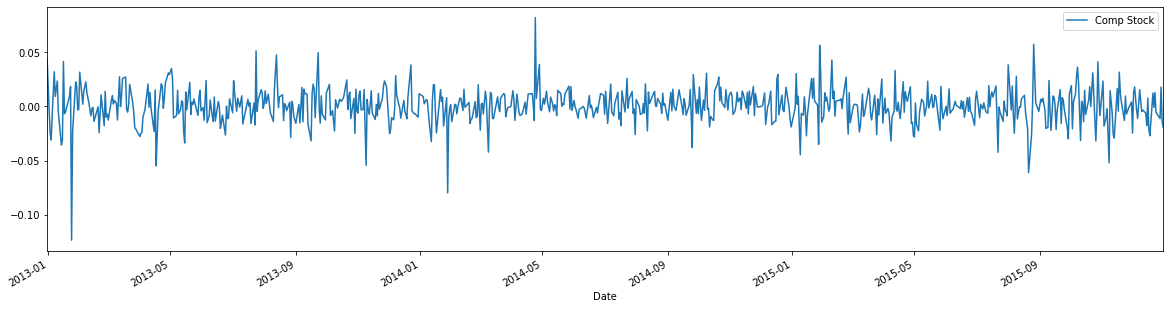

In [14]:
start_date='2012-12-31'
till_date='2015-12-31'
after_start_date=df["Date"]>=start_date
before_end_date=df["Date"]<=till_date
between_two_dates=after_start_date & before_end_date
df_seg_2=df.loc[between_two_dates]
df_seg_2['Date']=pd.to_datetime(df_seg_2['Date'])
df_seg_2.set_index('Date',inplace=True)
df_seg_2.plot(figsize=(20,5))

C:\Users\RIA MAITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


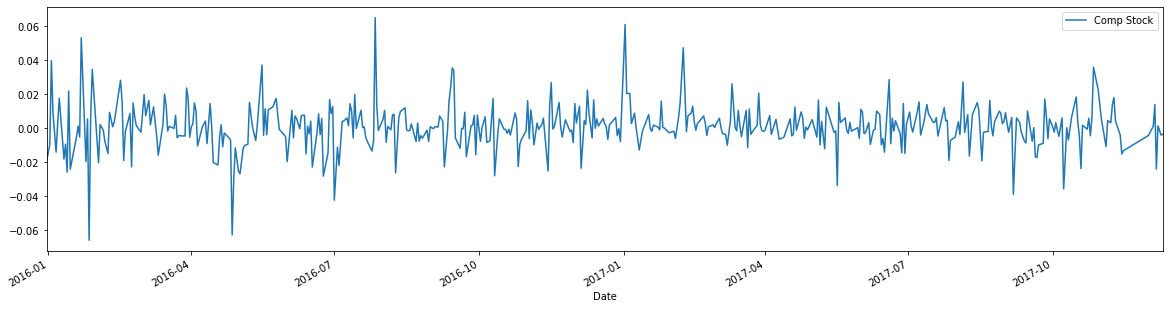

In [15]:
start_date='2015-12-31'
till_date='2017-12-31'
after_start_date=df["Date"]>=start_date
before_end_date=df["Date"]<=till_date
between_two_dates=after_start_date & before_end_date
df_seg_3=df.loc[between_two_dates]
df_seg_3['Date']=pd.to_datetime(df_seg_3['Date'])
df_seg_3.set_index('Date',inplace=True)
df_seg_3.plot(figsize=(20,5))

From the above graphs we can say itsa seasonal data as every year oil investment is going up

# Now we will check if data is stationary or not.

In [16]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [19]:
test_result=adfuller(df['Comp Stock']) # adfuller give us 5 values

In [20]:
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-12.473386265908339, 3.207774293088362e-23, 12, 1971, {'1%': -3.4336720887549483, '5%': -2.863007508094813, '10%': -2.567551240570721}, -10649.854659769328)


In [21]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Comp_stock):
    result=adfuller(Comp_stock) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [22]:
adfuller_test(df['Comp Stock'])

ADF Test Statistic : -12.473386265908339
p-value : 3.207774293088362e-23
#Lags Used : 12
Number of Observations Used : 1971
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


Our data is stationary as p value is less than 0.05



# Auto Regressive Model

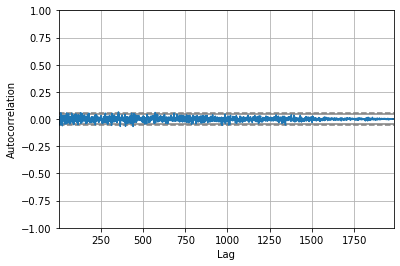

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Comp Stock'])
plt.show()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

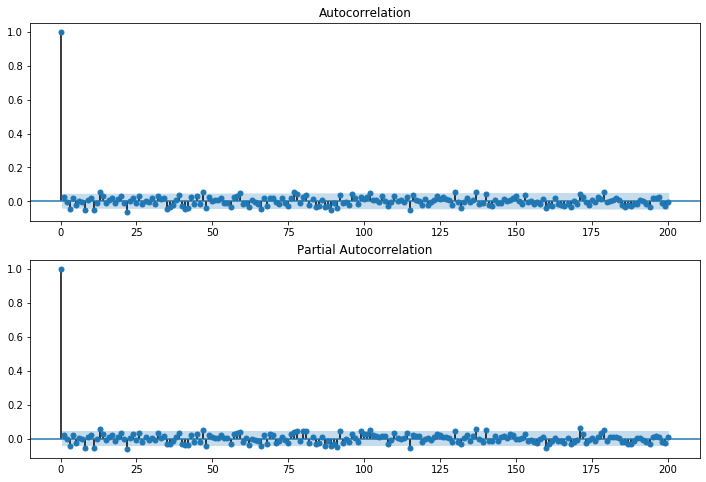

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Comp Stock'],lags=200,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Comp Stock'],lags=200,ax=ax2)

# SARIMAX - seasonal arimax

In [28]:
import statsmodels.api as sm 

In [30]:
model=sm.tsa.statespace.SARIMAX(df['Comp Stock'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

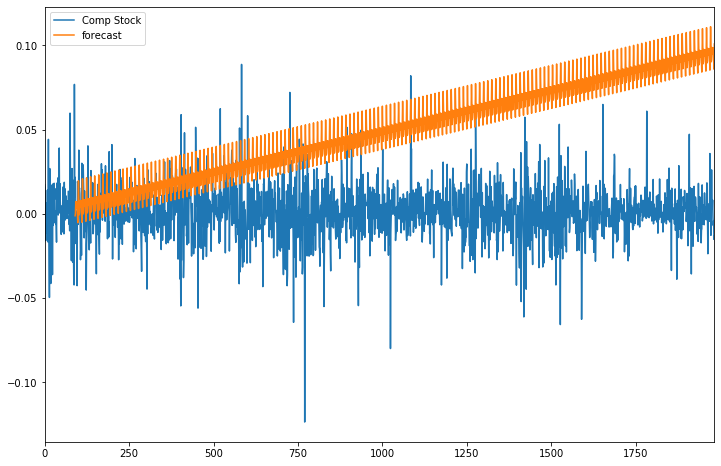

In [32]:
df['forecast']=results.predict(start=90,end=2000,dynamic=True)
df[['Comp Stock','forecast']].plot(figsize=(12,8))

In [34]:
#creating some data to predict future of this.
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1]+ DateOffset(months=x)for x in range(0,46)]

In [35]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [36]:
future_datest_df.tail()

,Date,Comp Stock,forecast
2021-04-15,NaN,NaN,NaN
2021-05-15,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN
2021-07-15,NaN,NaN,NaN
2021-08-15,NaN,NaN,NaN


In [37]:
future_df=pd.concat([df1,future_datest_df])

C:\Users\RIA MAITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


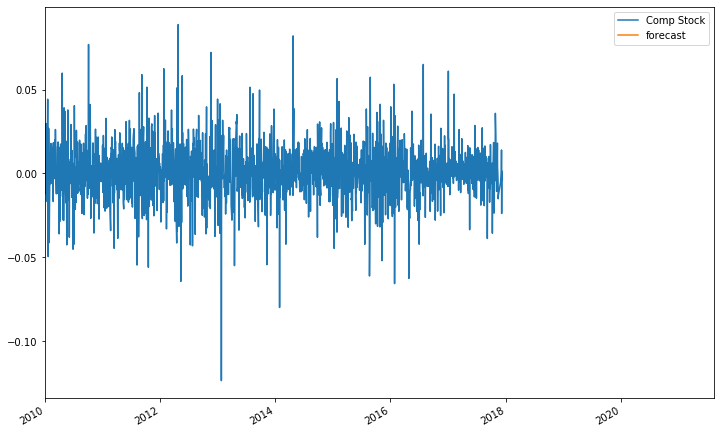

In [38]:
future_df['forecast'] = results.predict(start = 80, end = 2000, dynamic= True)  
future_df[['Comp Stock', 'forecast']].plot(figsize=(12, 8))